In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
# import pydot
import matplotlib.pyplot as plt
# import h5py
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPooling2D
import keras.utils as np_utils
from keras.models import load_model 
from keras.utils import plot_model
import cv2
from sklearn.model_selection import train_test_split

In [2]:

# load data
numepochs=100
batchsize=128
folder_path = './data/'
images = []
labels = []
class_label = 0

original_images = []

def load_original_images(folder):
	for filename in os.listdir(folder):
		img = cv2.imread(os.path.join(folder, filename))
		if img is not None:
			original_images.append(img)
			
def load_images_from_folder(folder,class_label):
	for filename in os.listdir(folder):
		img = cv2.imread(os.path.join(folder, filename))
		if img is not None:
			img = cv2.resize(img,(128,128))
			img = img.reshape(128,128,3)
			images.append(img)
			labels.append(class_label)
	class_label=class_label+1
	return class_label

class_label = load_images_from_folder(folder_path+'benign',class_label)
class_label = load_images_from_folder(folder_path+'malignant',class_label)
# load_original_images(folder_path+'benign')
# load_original_images(folder_path+'malignant')

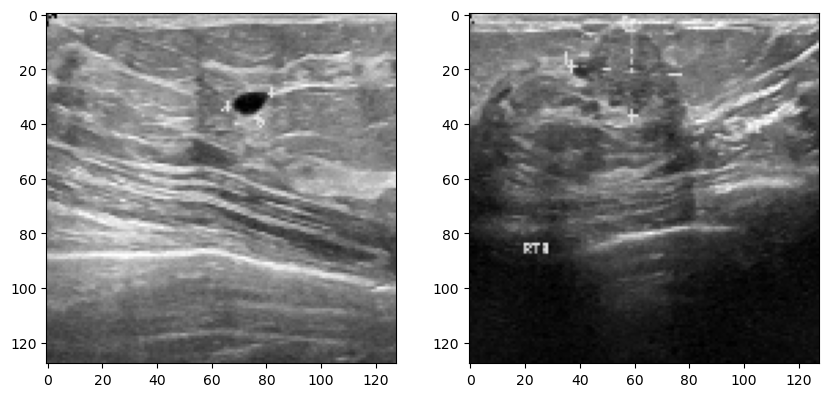

In [3]:
# Display the image
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,2,1)
plt.imshow(images[0])
fig.add_subplot(2,2,2)
plt.imshow(images[1])
# fig.add_subplot(2,2,3)
# plt.imshow(original_images[0])
# fig.add_subplot(2,2,4)
# plt.imshow(original_images[1])

In [4]:

Data = np.asarray(images)
Labels = np.asarray(labels)

X_train,X_test,y_train,y_test=train_test_split(Data,Labels,test_size=0.2,random_state=2)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 128 
X_test = X_test / 128
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#printing sizes
print ("train data shape:")
print (X_train.shape)
print ("test data shape:")
print (X_test.shape)
print ("train label shape:")
print (y_train.shape)
print ("test label shape:")
print (y_test.shape)
#print (y_test)


train data shape:
(517, 128, 128, 3)
test data shape:
(130, 128, 128, 3)
train label shape:
(517, 2)
test label shape:
(130, 2)


In [7]:

# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Input(shape=(128,128,3)))
	model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
	#model.add(Conv2D(32, (3, 3), activation='relu',padding = 'same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(32, (3, 3), activation='relu',padding = 'same'))
	#model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
	#model.add(Conv2D(128, (3, 3), activation='relu',padding = 'same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dropout(0.5))
	model.add(Dense(64, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(64, activation='relu'))
	model.add(Dropout(0.5))
	#model.add(Dense(50, activation='relu'))
	#model.add(Dropout(0.2))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
	
# build the model
model = larger_model()

In [8]:


# Fit the model
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=numepochs, batch_size=batchsize)

Epoch 1/100


2024-10-14 18:22:53.026841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.6216 - loss: 0.6844 - val_accuracy: 0.7000 - val_loss: 0.6474
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6582 - loss: 0.6234 - val_accuracy: 0.7000 - val_loss: 0.5914
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.6564 - loss: 0.6380 - val_accuracy: 0.7000 - val_loss: 0.6075
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.6698 - loss: 0.6160 - val_accuracy: 0.7000 - val_loss: 0.5929
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6522 - loss: 0.6215 - val_accuracy: 0.7000 - val_loss: 0.5924
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6678 - loss: 0.6078 - val_accuracy: 0.7000 - val_loss: 0.6308
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6441 - loss: 0.6264 - val_accuracy: 0.7000 - val_loss: 0.5858
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.6793 - loss: 0.6140 - val_accuracy: 0.7000 - val_loss: 0.5862
Ep

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,244,712 (12.38 MB)

 Trainable params: 1,081,570 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,163,142 (8.25 MB)

In [9]:
model.summary()
model.save('m0_1_0.keras')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,244,712 (12.38 MB)

 Trainable params: 1,081,570 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,163,142 (8.25 MB)

In [12]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1,batch_size=batchsize)
print("Deep Net Accuracy: %.2f%%" % (scores[1]*100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8531 - loss: 0.7410 
Deep Net Accuracy: 85.38%


In [29]:
#reloading a model
#model = load_model('reloadmodel.h5')
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#hist=model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10, batch_size=1)

In [ ]:

#testing an image from the test set
print("\n\n***** TESTING AN IMAGE FROM TEST SET *****\n")
test_image = X_test[0:1]
print("Shape of test image 1:")
print (test_image.shape)
print("Predicted accuracies:")
print(model.predict(test_image))
# print("Predicted class:")
# print(model.predict_classes(test_image))
# print("Actual class:")
# print(y_test[0:1])


In [ ]:

# #testing any image
# print("\n\n***** TESTING ANY RANDOM IMAGE *****\n")
# test_image = cv2.imread('m1.jpg')
# test_image= cv2.resize(test_image,(128,128))
# test_image = test_image.reshape(128,128,3)
# test_image = np.array(test_image)
# test_image = test_image.astype('float32')
# test_image /= 255
# test_image= np.expand_dims(test_image, axis=0)
# print("Shape of test image 2:")
# print (test_image.shape)
# print("Predicted accuracies:")
# print((model.predict(test_image)))
# print("Predicted class:")
# print(model.predict_classes(test_image))


In [ ]:


# # visualizing losses and accuracy
# train_loss=hist.history['loss']
# val_loss=hist.history['val_loss']
# train_acc=hist.history['acc']
# val_acc=hist.history['val_acc']
# xc=range(numepochs)

# plt.figure(1,figsize=(14,7))
# #plt.figure(1)
# plt.subplot(121)
# plt.plot(xc,train_loss)
# plt.plot(xc,val_loss)
# plt.xlabel('num of Epochs')
# plt.ylabel('loss')
# plt.title('train_loss vs val_loss')
# plt.grid(True)
# plt.legend(['train','val'])
# #print plt.style.available # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])

# #plt.figure(2,figsize=(7,5))
# plt.subplot(122)
# plt.plot(xc,train_acc)
# plt.plot(xc,val_acc)
# plt.xlabel('num of Epochs')
# plt.ylabel('accuracy')
# plt.title('train_acc vs val_acc')
# plt.grid(True)

# plt.legend(['train','val'],loc=4)
# #print plt.style.available # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])

# plt.show()